In [1]:
import os
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from skimage.io import imread_collection,imsave
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True,device_count = {'CPU' : 1, 'GPU' : 1}))
K.set_session(sess)

In [131]:
cats = os.getcwd()+"\\data\\train\\"+"cat*.jpg"

catTensor = imread_collection(cats)

len(catTensor)

12500

In [583]:
catTensor[0].shape

(374, 500, 3)

In [586]:
cats = os.getcwd()+"\\data\\resize\\cats\\cat*.jpg"
catTensor = imread_collection(cats)

In [587]:
catTensor[0].shape

(256, 256, 3)

In [102]:
ctr = 0
for cat in catTensor:
    imsave(os.getcwd()+"\\data\\resize\\cats\\cat"+str(ctr)+".jpg",resize(cat,(256,256,3)))
    ctr+=1

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [3]:
def fixed_generator(generator):
    for batch in generator:
        yield (batch, batch)


datagen = ImageDataGenerator()
catGen = datagen.flow_from_directory(os.getcwd()+"\\data\\resize\\",class_mode=None,batch_size=32,target_size=(256,256))

Found 12500 images belonging to 1 classes.


In [596]:
input_img = Input(shape=(256, 256, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [115]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_241 (Conv2D)          (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_243 (Conv2D)          (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 32, 32, 8)         0         
__________

In [601]:
autoencoder = load_model("first_1.h5")

In [ ]:
res = autoencoder.predict(np.expand_dims(catTensor[0], axis=0))
plt.imshow(res[0])
plt.show()

In [599]:
autoencoder.fit_generator(fixed_generator(catGen),samples_per_epoch=12500,verbose=1,epochs=10)

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., verbose=1, epochs=10, steps_per_epoch=12500)`
  """Entry point for launching an IPython kernel.


Epoch 1/10
  178/12500 [..............................] - ETA: 18:19 - loss: 359.8425

KeyboardInterrupt: 

In [7]:
autoencoder.save("first_1.h5")

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 255 + 1) instead
  """Entry point for launching an IPython kernel.


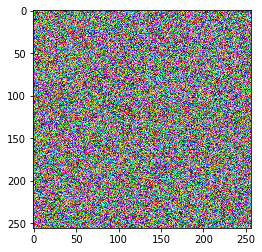

In [458]:
res = autoencoder.predict(np.random.random_integers(255,size=(1,256,256,3)))
plt.imshow(res[0])
plt.show()

In [572]:
autoencoder.fit(res,res,verbose=0,epochs=10000)

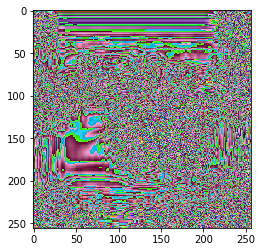

In [578]:
res =autoencoder.predict(res) 
plt.imshow(res[0,0:256,0:256])
plt.show()

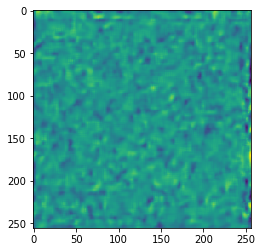

In [356]:
plt.imshow(res[0,0:256,0:256,0])
plt.show()

In [352]:
res[0,0:256,0:256,0].shape

(256, 256)

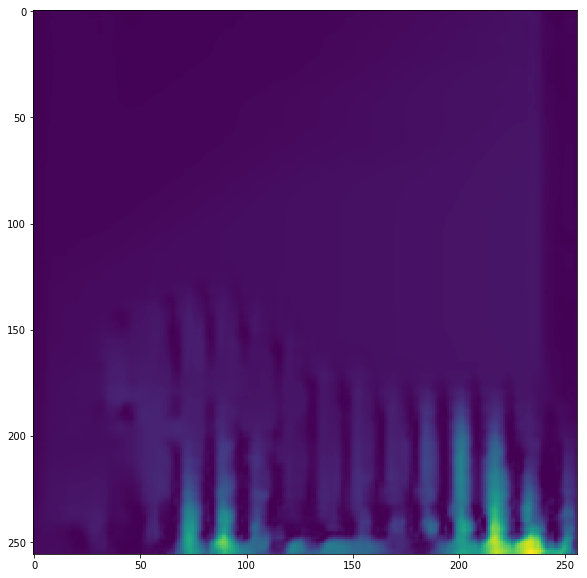

In [457]:
plt.figure(figsize=(10,10))
res =autoencoder.predict(res) 
#plt.imshow(res[0])
#plt.show()
plt.imshow(res[0,0:256,0:256,2])
plt.show()

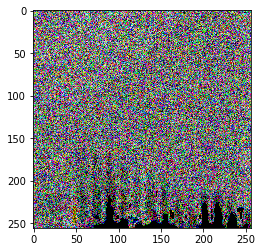

In [442]:
for i in range(10):
    res =autoencoder.predict(res) 
    plt.imshow(res[0])
plt.show()

In [187]:
res.shape

(1, 256, 256, 3)

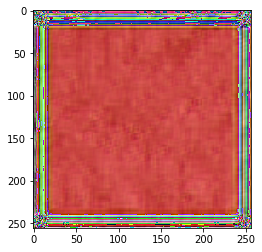

In [81]:
np.random.random_integers(100,size=(1,3))

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  """Entry point for launching an IPython kernel.


array([[15, 75, 63]])